In [ ]:
%%bash

curl --insecure "https://singlecell.broadinstitute.org/single_cell/api/v1/bulk_download/generate_curl_config?accessions=SCP1307&auth_code=<your_new_code>&directory=all&context=study" -o cfg.txt; curl -K cfg.txt && rm cfg.txt

In [ ]:
%pip install scanpy

In [20]:
import scanpy as sc
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/aneesavalentine/singlecell-1/data/SCP1307/expression/combined_durban_eoe_resection_no_sa_HIV_aug18_counts.csv', index_col=0)

# Transpose the DataFrame to have cells as rows and genes as columns (compatible with AnnData)
df = df.transpose()

# Convert the DataFrame to an AnnData object
adata = sc.AnnData(df)

# Save the AnnData object to an .h5ad file
adata.write('umi_counts.h5ad')

In [86]:
# Load the .h5ad file into an AnnData object
adata = sc.read_h5ad('umi_counts.h5ad')

In [87]:
adata

AnnData object with n_obs × n_vars = 26556 × 28087

In [82]:
metadata = pd.read_csv("/Users/aneesavalentine/singlecell-1/data/SCP1307/metadata/sc_portal_meta_with_SA.csv")
# Ensure the indices are strings

# Drop the first row
metadata = metadata.drop(0)

# Set the 'NAME' column as the index
metadata.set_index('NAME', inplace=True)

metadata.index = metadata.index.astype(str)

print(metadata.head())

                                            biosample_id     donor_id  \
NAME                                                                    
GCTGTATCAATT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  Resection_2D  Resection_2   
GTCCGTCCCAAT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  Resection_2D  Resection_2   
CAAATCGATACT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  Resection_2D  Resection_2   
CGAAATCGACTA_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  Resection_2D  Resection_2   
TAGCCTCGAATT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  Resection_2D  Resection_2   

                                                   species  \
NAME                                                         
GCTGTATCAATT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  NCBITaxon_9606   
GTCCGTCCCAAT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  NCBITaxon_9606   
CAAATCGATACT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  NCBITaxon_9606   
CGAAATCGACTA_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  NCBITaxon_9606   
TAGCCTCGAATT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  NCBITaxon_9606   

                                           species__o

In [88]:
adata.obs = metadata

In [84]:
metadata.shape

(26556, 12)

In [90]:
print(metadata.head())

                                            biosample_id     donor_id  \
NAME                                                                    
GCTGTATCAATT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  Resection_2D  Resection_2   
GTCCGTCCCAAT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  Resection_2D  Resection_2   
CAAATCGATACT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  Resection_2D  Resection_2   
CGAAATCGACTA_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  Resection_2D  Resection_2   
TAGCCTCGAATT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  Resection_2D  Resection_2   

                                                   species  \
NAME                                                         
GCTGTATCAATT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  NCBITaxon_9606   
GTCCGTCCCAAT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  NCBITaxon_9606   
CAAATCGATACT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  NCBITaxon_9606   
CGAAATCGACTA_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  NCBITaxon_9606   
TAGCCTCGAATT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  NCBITaxon_9606   

                                           species__o

In [92]:
adata.X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [91]:
adata.obs.head()

,biosample_id,donor_id,species,species__ontology_label,disease,disease__ontology_label,organ,organ__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,sex,cell_subset
NAME,,,,,,,,,,,,
GCTGTATCAATT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,Resection_2D,Resection_2,NCBITaxon_9606,Homo sapiens,MONDO_0004992,cancer,UBERON_0003287,midgut region of duodenum,EFO_0008919,Seq-Well,male,T_MT
GTCCGTCCCAAT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,Resection_2D,Resection_2,NCBITaxon_9606,Homo sapiens,MONDO_0004992,cancer,UBERON_0003287,midgut region of duodenum,EFO_0008919,Seq-Well,male,NK_GZMAhi
CAAATCGATACT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,Resection_2D,Resection_2,NCBITaxon_9606,Homo sapiens,MONDO_0004992,cancer,UBERON_0003287,midgut region of duodenum,EFO_0008919,Seq-Well,male,T_gamma_delta_CXCR4hi
CGAAATCGACTA_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,Resection_2D,Resection_2,NCBITaxon_9606,Homo sapiens,MONDO_0004992,cancer,UBERON_0003287,midgut region of duodenum,EFO_0008919,Seq-Well,male,T_gamma_delta_GZMAhi
TAGCCTCGAATT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,Resection_2D,Resection_2,NCBITaxon_9606,Homo sapiens,MONDO_0004992,cancer,UBERON_0003287,midgut region of duodenum,EFO_0008919,Seq-Well,male,NK_GZMAhi


In [93]:
adata.var_names

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A4GALT', 'AAAS',
       'AACS', 'AADAC',
       ...
       'GALNT4', 'RNA18S5', 'RNU6-6P', 'RNU1-1', 'RPS17', 'AC002395.1',
       'RNU6-610P', 'RNU2-38P', 'RNU6-1058P', 'RNU6-3P'],
      dtype='object', length=28087)

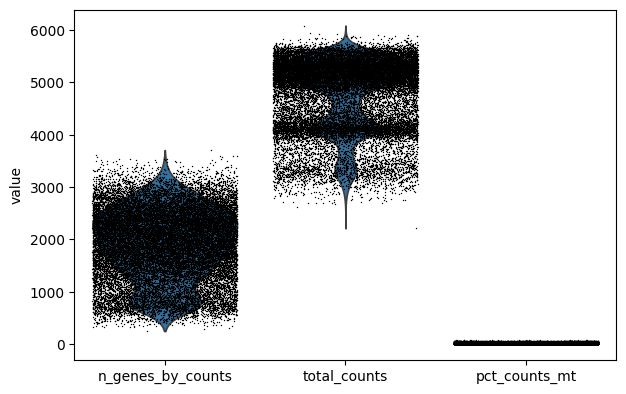

In [94]:
# Identify mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-')

# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# Visualize QC metrics
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4)

# Filter cells
adata = adata[adata.obs.n_genes_by_counts > 200, :]
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [95]:
# Normalize total counts and log transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


/Users/aneesavalentine/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [96]:
# Find highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# Filter to keep only highly variable genes
adata = adata[:, adata.var.highly_variable]


/Users/aneesavalentine/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


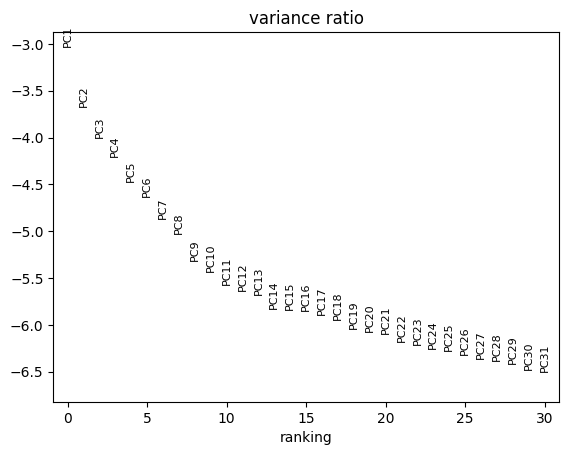

In [97]:
# Scale the data
sc.pp.scale(adata, max_value=10)

# Perform PCA
sc.tl.pca(adata, svd_solver='arpack')

# Visualize explained variance ratio
sc.pl.pca_variance_ratio(adata, log=True)


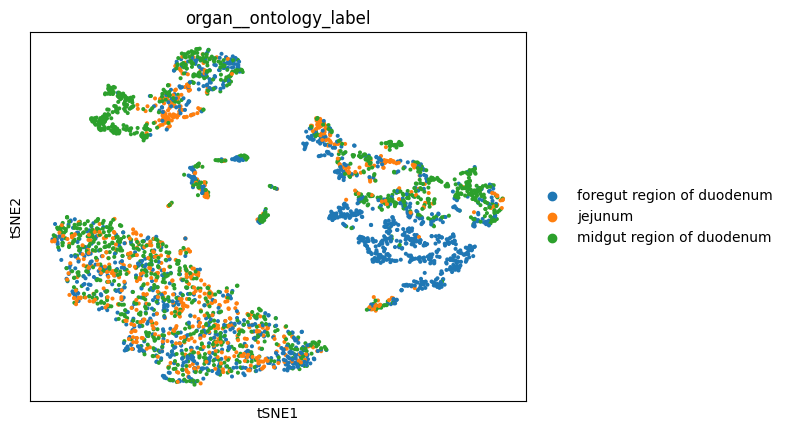

In [100]:
# Run t-SNE
sc.tl.tsne(adata, n_pcs=10)

# Plot t-SNE
sc.pl.tsne(adata, color=['organ__ontology_label'])


In [ ]:
# Save the AnnData object for future use
adata.write("processed_single_cell_data.h5ad")
